# 다항회귀 특성공학

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # train_test 데이터 분할
from sklearn.preprocessing import PolynomialFeatures # 전처리용 변환기 fit(), transfrom()
from sklearn.linear_model import LinearRegression # 선형회귀 분석
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.linear_model import Ridge # 릿지 회귀 규제
from sklearn.linear_model import Lasso # 라쏘 회귀 규제
import matplotlib.pyplot as plt # 그래프 그리기

---

* **데이터 준비하기**

## `pd.read_csv()`

In [50]:
df = pd.read_csv("https://bit.ly/perch_csv_data")
perch_full = df.to_numpy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


In [45]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [52]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)
train_input

array([[19.6 ,  5.14,  3.04],
       [22.  ,  5.88,  3.52],
       [18.7 ,  5.2 ,  3.12],
       [17.4 ,  4.59,  2.94],
       [36.  , 10.61,  6.74],
       [25.  ,  6.44,  3.68],
       [40.  , 11.93,  7.11],
       [39.  , 12.43,  7.35],
       [43.  , 11.93,  7.28],
       [22.  ,  5.64,  3.52],
       [20.  ,  5.08,  2.77],
       [22.  ,  6.11,  3.52],
       [24.  ,  7.29,  3.72],
       [27.5 ,  7.17,  4.34],
       [43.  , 12.51,  7.42],
       [40.  , 11.73,  7.22],
       [24.  ,  6.38,  3.82],
       [21.  ,  5.92,  3.31],
       [27.5 ,  7.05,  4.34],
       [40.  , 12.38,  7.46],
       [32.8 , 10.03,  6.02],
       [26.5 ,  7.17,  4.14],
       [36.5 , 10.88,  6.86],
       [13.7 ,  3.53,  2.  ],
       [22.7 ,  5.95,  3.63],
       [15.  ,  3.82,  2.43],
       [37.  , 10.57,  6.37],
       [35.  , 11.49,  7.8 ],
       [28.7 ,  7.59,  4.64],
       [23.5 ,  6.28,  3.72],
       [39.  , 11.14,  6.  ],
       [21.  ,  5.69,  3.56],
       [23.  ,  5.22,  3.63],
       [22

---

* 특성변환 연습

## `PolynomialFeatures()` 특성 변환

* `degree = 5` 라는 설정 값을 통해 최고차항을 설정가능

## `.fit()` 훈련

## `.transfrom()` 변환

In [53]:
from sklearn.preprocessing import PolynomialFeatures # 전처리용 변환기 fit(), transfrom()
polyE = PolynomialFeatures()
polyE.fit([[2,3]])
print(polyE.transform([[2,3]]))          

[[1. 2. 3. 4. 6. 9.]]


* 원래 2, 3 이었던 특성에 $2^2, 3^2, 2\times3$ 이 들어오면서 2,3,4,6,9 로 특성이 많아짐
* 여기에 1은 선형방정식의 절편값인 $A\times1$ 에서 생긴것
* 하지만 사이킷런의 선형 모델은 자동으로 절편을 추가하기 때문에 1이 필요없다
* 그래서 include_bias=False 로 지정한다.

* **이때 `.fit([[  ]])`,`.transpose([[]])` 과 같이 대괄호가 2개 들어가는 것에 유의**

* **특성 변환**

## `poly.get_feature_names()` 특성 조합 확인

In [57]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape) # 데이터 42개 특성 9개 확인
print(poly.get_feature_names()) # 특성 9개의 조합 확인

(42, 9)
['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']


---
* 다중 회귀 모델 훈련

In [103]:
# train 셋
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [104]:
# test 셋
test_poly = poly.transform(test_input)
print(lr.score(test_poly, test_target))

0.9714559911594203


-------------

* 5차항 특성 생성
> 많은 특성을 생성하면 과대적합 발생

In [105]:
poly5 = PolynomialFeatures(degree=5, include_bias=False)
poly5.fit(train_input)
train_poly5 = poly5.transform(train_input)
test_poly5 = poly5.transform(test_input)
print(train_poly5.shape, test_poly5.shape)

(42, 55) (14, 55)


In [106]:
lr.fit(train_poly5, train_target)
print(lr.score(train_poly5, train_target)) # 아주 높은 점수

0.999999999997515


In [107]:
print(lr.score(test_poly5, test_target)) # 아주 낮은 점수

-144.40196592191958


---

## `StandardScaler() as SS` 정규화 함수

* 규제를 적용하기 위한 데이터 정규화
* `ss.fit(train_data)`, `ss.transform(train_data)` 를 이용
* test 데이터에도 train 데이터를 통해 학습한 정규화를 이용한다

In [108]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly5)
train_scaled = ss.transform(train_poly5)
test_scaled = ss.transform(test_poly5)

## 릿지(ridge) 와 라쏘(lasso)
선형 회귀 모델에 규제를 추가한 모델

* `릿지 ridge`는 계수를 제곱한 값을 기준으로 규제
* `라쏘 lasso`는 계수의 절댓값을 기분으로 규제

일반적으로 릿지를 선호

### `Ridge()` 릿지

* alpha 값을 통해 규제의 강도를 조절할수있다.

In [109]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [110]:
print(ridge.score(test_scaled, test_target))

0.9790693977615376


alpha : 0.001, train_score : 0.9930455252088376, test_score : 0.956938896147935
alpha : 0.01, train_score : 0.9917809981250515, test_score : 0.9800187936871864
alpha : 0.1, train_score : 0.9903815817570366, test_score : 0.9827976465386965
alpha : 1, train_score : 0.9896101671037343, test_score : 0.9790693977615376
alpha : 10, train_score : 0.988728468997471, test_score : 0.9725329582461569
alpha : 100, train_score : 0.9841843235774494, test_score : 0.9627042641050291

최고점 alpha : 0.1, train_score : 0.9903815817570366, test_score : 0.9827976465386965


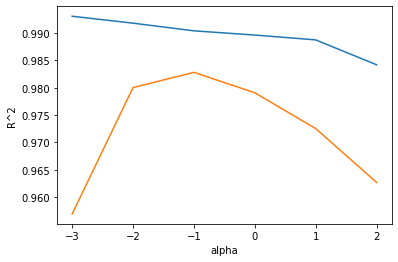

In [117]:
# ################################################
# #                  특성 변환                   #
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(include_bias=False)
# poly.fit(train_input)
# train_poly = poly.transform(train_input)
# test_poly = poly.transform(test_input)
# ################################################

# ################################################
# #                   정규화                     #
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# ss.fit(train_poly)
# train_scaled = ss.transform(train_poly)
# test_scaled = ss.transform(test_poly)
# ################################################

################################################
#                 모델 계산                    #
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_score = []
test_score = []
score = 1
max_train = 0
max_test = 0
temp = 0

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha) # 모델 생성
    ridge.fit(train_scaled, train_target) # 훈련
    train_c = ridge.score(train_scaled, train_target)
    test_c = ridge.score(test_scaled, test_target)
    score_c = train_c - test_c
    train_score.append(train_c)
    test_score.append(test_c)
    print(f"alpha : {alpha}, train_score : {train_c}, test_score : {test_c}")
          
    if score_c < score:
        score = score_c
        temp = alpha
        max_train = train_c
        max_test = test_c

print(f"\n최고점 alpha : {temp}, train_score : {max_train}, test_score : {max_test}")
###############################################


###############################################
#               릿지 모델 그래프               #
import matplotlib.pyplot as plt
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()
###############################################